In [3]:
#Checking current working directory
import os
print(os.getcwd())

E:\PYTHON\SLRegression_3


In [2]:
#Setting working directory
# path = 'E:\\PYTHON\\jupyternotebook'
path = 'E:\\PYTHON\\SLRegression_3'
os.chdir(path)
print(os.getcwd())

E:\PYTHON\SLRegression_3


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
dataset = pd.read_csv("Salary_Data.csv")

In [7]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [10]:
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,1].values

In [11]:
type(X)

numpy.ndarray

In [12]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,Y,test_size=0.2, random_state =12345)


In [13]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_Train, Y_Train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [14]:
Y_Pred = regressor.predict(X_Test) 
Y_Pred

array([115612.05085234,  63707.06397661,  81637.87762459,  44832.52329453,
        72200.60728355,  56157.24770378])

In [15]:
Y_Test

array([116969.,  56957.,  81363.,  43525.,  67938.,  64445.])

Text(0, 0.5, 'Salary')

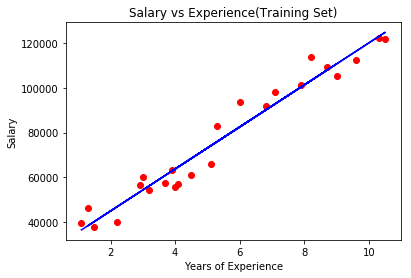

In [16]:
plt.scatter(X_Train,Y_Train,color = 'red')
plt.plot(X_Train,regressor.predict(X_Train), color = 'blue')
plt.title('Salary vs Experience(Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

In [13]:
regressor.coef_

array([9437.27034104])

In [35]:
regressor.predict(np.atleast_2d(10))

array([120330.68602286])

In [36]:
regressor.score(X_Test,Y_Test)

0.9577556268356333

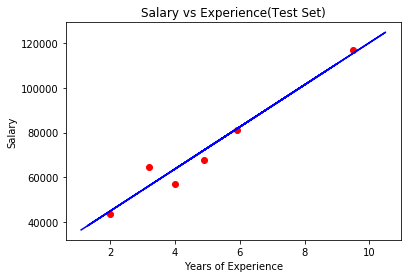

In [39]:
plt.scatter(X_Test,Y_Test,color = 'red')
plt.plot(X_Train,regressor.predict(X_Train), color = 'blue')
plt.title('Salary vs Experience(Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# Multiple Linear Regression 

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [18]:
from sklearn.datasets import load_boston
housing_data = load_boston()

In [19]:
print(housing_data.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [20]:
print(housing_data["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [21]:
boston = pd.DataFrame(housing_data.data)

boston.columns = housing_data.feature_names
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [22]:
boston['Price'] = housing_data.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [19]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
Price      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [21]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


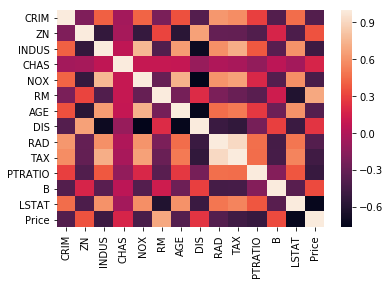

In [23]:
sns.heatmap(boston.corr())

In [24]:
boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


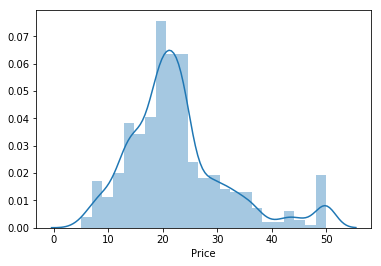

In [25]:
sns.distplot(boston['Price'])

In [26]:
X = boston.drop('Price', axis =1)
Y = boston['Price']

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=50)
print(X_train.shape)
print(X_test.shape)

(354, 13)
(152, 13)


In [29]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()


In [30]:
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [31]:
lr.score(X_test,Y_test)

0.6685538790447987

In [32]:
lr.intercept_

25.469528442762886

In [33]:
lr.coef_

array([-1.02245423e-01,  3.11044112e-02,  1.43693788e-02,  1.65964577e+00,
       -1.58693910e+01,  5.03222436e+00, -7.16365483e-04, -1.31353766e+00,
        2.55945159e-01, -1.23369178e-02, -9.03145563e-01,  9.65756208e-03,
       -4.22793524e-01])

In [34]:
coeff_df = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
CRIM,-0.102245
ZN,0.031104
INDUS,0.014369
CHAS,1.659646
NOX,-15.869391
RM,5.032224
AGE,-0.000716
DIS,-1.313538
RAD,0.255945
TAX,-0.012337


In [35]:
pred = lr.predict(X_test)
pred

array([ 9.70536163e+00,  2.52526846e+01,  1.99563787e+01,  2.78890172e+01,
        2.22739530e+01,  2.32476003e+01,  1.62794573e+01,  1.69545473e+01,
        1.29304677e+01,  2.49423296e+01,  1.44246339e+01,  2.86653627e+01,
        1.76944262e+01,  3.46031656e+01,  1.85769591e+01,  1.35355785e+01,
        1.40027050e+01,  2.86569561e+01,  2.24340994e+01,  2.41506896e+01,
        2.40056244e+01,  3.72997269e+01,  3.06816250e+01,  1.93607196e+01,
        2.05776606e+01,  1.70641899e+01,  1.15241219e+01,  2.40849661e+01,
        3.10697041e+01,  2.36199284e+01,  2.10421914e+01,  5.88252060e+00,
        3.03053885e+01,  3.63167383e+01,  2.16908598e+01,  3.23510449e+01,
        3.46814402e+01,  2.07641740e+01,  2.85939847e+01,  4.01152089e+01,
        3.98810686e+01,  1.27048376e+01,  2.06620305e+01,  2.52423966e+01,
        2.08504892e+00,  1.46209833e+01,  2.22242105e+01,  3.48031883e+01,
        2.60939130e+01,  2.16408781e+01,  3.03883691e+01,  2.52756205e+01,
        1.50906276e+01,  

Text(0, 0.5, 'Predicted prices')

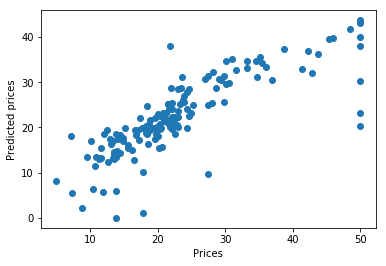

In [36]:
plt.scatter(Y_test,pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")

In [37]:
Residuals = Y_test - pred

In [38]:
type(Residuals)

pandas.core.series.Series

In [39]:
Residuals.head()

365    17.794638
313    -3.652685
461    -2.256379
158    -3.589017
333    -0.073953
Name: Price, dtype: float64

In [40]:
stddev = Residuals.std()

In [41]:
stddev

5.8075442162083215

In [42]:
resmean = Residuals.mean()
print(resmean)

0.6019601981750692


In [64]:
std_Residuals = (Residuals - resmean)/stddev

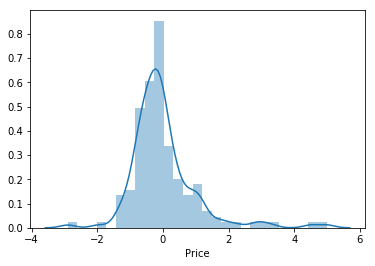

In [66]:
sns.distplot(std_Residuals)

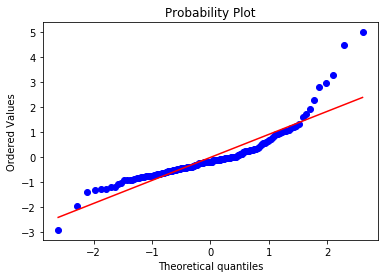

In [67]:
#Other wway to find normality
from scipy import stats
qqplot = stats.probplot(std_Residuals, plot=sns.mpl.pyplot)

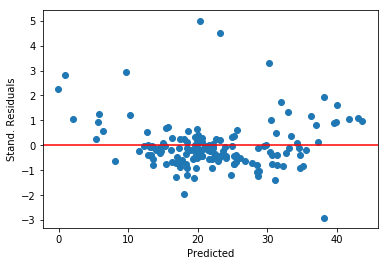

In [68]:
plt.scatter(pred,std_Residuals)
plt.xlabel("Predicted")
plt.ylabel("Stand. Residuals")
plt.axhline(y = 0, color = 'r', linestyle='-')
plt.show()

In [72]:
import statsmodels.api as sm
X_train_ols = sm.add_constant(X_train)
result = sm.OLS(Y_train,X_train_ols).fit()

In [73]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
251,0.21409,22.0,5.86,0.0,0.431,6.438,8.9,7.3967,7.0,330.0,19.1,377.07,3.59
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
257,0.61154,20.0,3.97,0.0,0.647,8.704,86.9,1.8010,5.0,264.0,13.0,389.70,5.12
35,0.06417,0.0,5.96,0.0,0.499,5.933,68.2,3.3603,5.0,279.0,19.2,396.90,9.68
339,0.05497,0.0,5.19,0.0,0.515,5.985,45.4,4.8122,5.0,224.0,20.2,396.90,9.74


In [74]:
X_train_ols.head(3)

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
251,1.0,0.21409,22.0,5.86,0.0,0.431,6.438,8.9,7.3967,7.0,330.0,19.1,377.07,3.59
3,1.0,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
257,1.0,0.61154,20.0,3.97,0.0,0.647,8.704,86.9,1.8010,5.0,264.0,13.0,389.70,5.12


In [5]:
results.params

NameError: name 'results' is not defined